<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

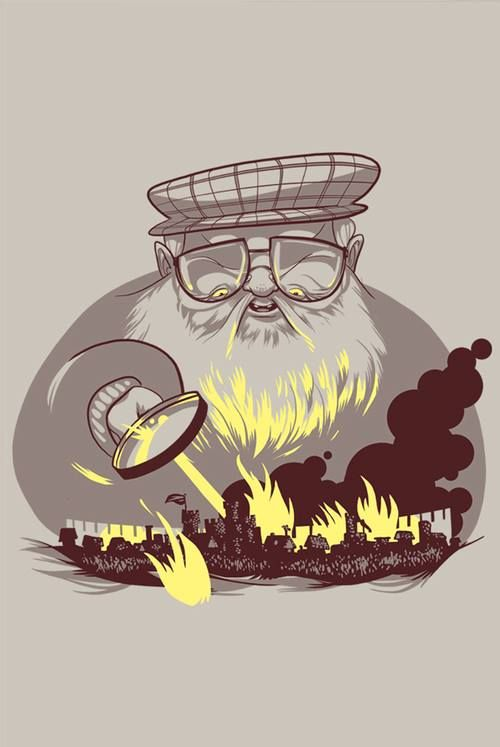

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 51.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 63.0MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

In [4]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

Заменим пропуски в категориальных столбцах title, isAliveSpouse, spouse,house на значение Unknown (для object) или -1 (для float).

In [6]:
data.loc[data.title.isna(), 'title']  = 'unknown'
data.loc[data.isAliveSpouse.isna(), 'isAliveSpouse']  = -1
data.loc[data.spouse.isna(), 'spouse']  = 'unknown'
data.loc[data.house.isna(), 'house']  = 'unknown'




In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             1557 non-null   object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1557 non-null   object 
 9   spouse            1557 non-null   object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

Преобразуем текстовые данные в нижний регистр во избежание различий в написании

In [8]:
data[data.select_dtypes(include=[object]).columns] = data.select_dtypes(include=[object]).apply(lambda x: x.str.lower())



Удалим неинформативные столбцы, имеющие менее 50 значений:

In [9]:
data.drop(columns=['mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir'], inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             1557 non-null   object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   house             1557 non-null   object 
 6   spouse            1557 non-null   object 
 7   book1             1557 non-null   int64  
 8   book2             1557 non-null   int64  
 9   book3             1557 non-null   int64  
 10  book4             1557 non-null   int64  
 11  book5             1557 non-null   int64  
 12  isAliveSpouse     1557 non-null   float64
 13  isMarried         1557 non-null   int64  
 14  isNoble           1557 non-null   int64  
 15  age               279 non-null    float64
 16  numDeadRelations  1557 non-null   int64  
 17  

Заполним пропуски в столбцах age и dateOfBirth медианными значениями

In [11]:
median_age_train = data['age'].median()
median_dateofBirth_train = data['dateOfBirth'].median()
data.loc[data['age'].isna(), 'age'] = median_age_train
data.loc[data['dateOfBirth'].isna(), 'dateOfBirth' ] = median_dateofBirth_train

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             1557 non-null   object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       1557 non-null   float64
 5   house             1557 non-null   object 
 6   spouse            1557 non-null   object 
 7   book1             1557 non-null   int64  
 8   book2             1557 non-null   int64  
 9   book3             1557 non-null   int64  
 10  book4             1557 non-null   int64  
 11  book5             1557 non-null   int64  
 12  isAliveSpouse     1557 non-null   float64
 13  isMarried         1557 non-null   int64  
 14  isNoble           1557 non-null   int64  
 15  age               1557 non-null   float64
 16  numDeadRelations  1557 non-null   int64  
 17  

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [13]:
data['isPopular'] = data['popularity'].apply(lambda x: 0 if x< 0.5 else 1)

In [14]:
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 0 if x==0 else 1)

In [15]:
data.drop(columns=['popularity', 'numDeadRelations'], inplace=True)

In [16]:
data['culture'].unique()

array([nan, 'rivermen', 'dornish', 'valyrian', 'ironborn', 'free folk',
       'northmen', 'summer isles', 'braavosi', 'dothraki', 'ghiscari',
       'vale mountain clans', 'reach', 'tyroshi', 'lhazarene', 'ironmen',
       'qartheen', 'lysene', 'westermen', 'westerman', 'qarth', 'lyseni',
       'qohor', 'westeros', 'norvoshi', 'first men', 'meereenese',
       'andal', 'astapori', 'ghiscaricari', 'braavos', 'stormlands',
       'valemen', 'myrish', 'lhazareen', 'dornishmen', 'sistermen',
       'northern mountain clans', 'andals', 'vale', 'crannogmen',
       'wildling', 'dorne', 'pentoshi', 'summer islander', 'westerlands',
       'summer islands'], dtype=object)

In [17]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Wildling' : [ 'Wildlings', 'Wildling']
}


Приведем содержимое словаря cult к нижнему регистру во избежание разночтений при поиске слов


In [18]:
cult = {k.lower(): [item.lower() for item in v] for k, v in cult.items()}

In [19]:
cult

{'summer islands': ['summer islands', 'summer islander', 'summer isles'],
 'ghiscari': ['ghiscari', 'ghiscaricari', 'ghis'],
 'asshai': ["asshai'i", 'asshai'],
 'lysene': ['lysene', 'lyseni'],
 'andal': ['andal', 'andals'],
 'braavosi': ['braavosi', 'braavos'],
 'dornish': ['dornishmen', 'dorne', 'dornish'],
 'myrish': ['myr', 'myrish', 'myrmen'],
 'westermen': ['westermen', 'westerman', 'westerlands'],
 'westerosi': ['westeros', 'westerosi'],
 'stormlander': ['stormlands', 'stormlander'],
 'norvoshi': ['norvos', 'norvoshi'],
 'northmen': ['the north', 'northmen'],
 'free folk': ['wildling', 'first men', 'free folk'],
 'qartheen': ['qartheen', 'qarth'],
 'reach': ['the reach', 'reach', 'reachmen'],
 'wildling': ['wildlings', 'wildling']}

In [20]:
def replace_culture(value):
    for key, values in cult.items():
        if value in values:
            return key
    return value


data['culture'] = data['culture'].str.lower().apply(replace_culture)

In [21]:
data['culture'].unique()

array([nan, 'rivermen', 'dornish', 'valyrian', 'ironborn', 'free folk',
       'northmen', 'summer islands', 'braavosi', 'dothraki', 'ghiscari',
       'vale mountain clans', 'reach', 'tyroshi', 'lhazarene', 'ironmen',
       'qartheen', 'lysene', 'westermen', 'qohor', 'westerosi',
       'norvoshi', 'meereenese', 'andal', 'astapori', 'stormlander',
       'valemen', 'myrish', 'lhazareen', 'sistermen',
       'northern mountain clans', 'vale', 'crannogmen', 'pentoshi'],
      dtype=object)

Заполним nan, оставшиеся в столбце culture значением unknown

In [22]:
data.loc[data.culture.isna(), 'culture']  = 'unknown'

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   dateOfBirth        1557 non-null   float64
 5   house              1557 non-null   object 
 6   spouse             1557 non-null   object 
 7   book1              1557 non-null   int64  
 8   book2              1557 non-null   int64  
 9   book3              1557 non-null   int64  
 10  book4              1557 non-null   int64  
 11  book5              1557 non-null   int64  
 12  isAliveSpouse      1557 non-null   float64
 13  isMarried          1557 non-null   int64  
 14  isNoble            1557 non-null   int64  
 15  age                1557 non-null   float64
 16  isAlive            1557 non-n

Создадим новый признак dateOfDeath как сумму признаков dateOfBirth и age и удалим старые признаки

In [24]:
data['dateOfDeath'] = data['dateOfBirth'] + data['age']
data.drop(columns=['dateOfBirth', 'age'], inplace=True)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler.fit(data[['dateOfDeath']])
#data[['dateOfDeath']] = scaler.transform(data[['dateOfDeath']])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   house              1557 non-null   object 
 5   spouse             1557 non-null   object 
 6   book1              1557 non-null   int64  
 7   book2              1557 non-null   int64  
 8   book3              1557 non-null   int64  
 9   book4              1557 non-null   int64  
 10  book5              1557 non-null   int64  
 11  isAliveSpouse      1557 non-null   float64
 12  isMarried          1557 non-null   int64  
 13  isNoble            1557 non-null   int64  
 14  isAlive            1557 non-null   int64  
 15  isPopular          1557 non-null   int64  
 16  boolDeadRelations  1557 non-n

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [27]:
import seaborn as sns

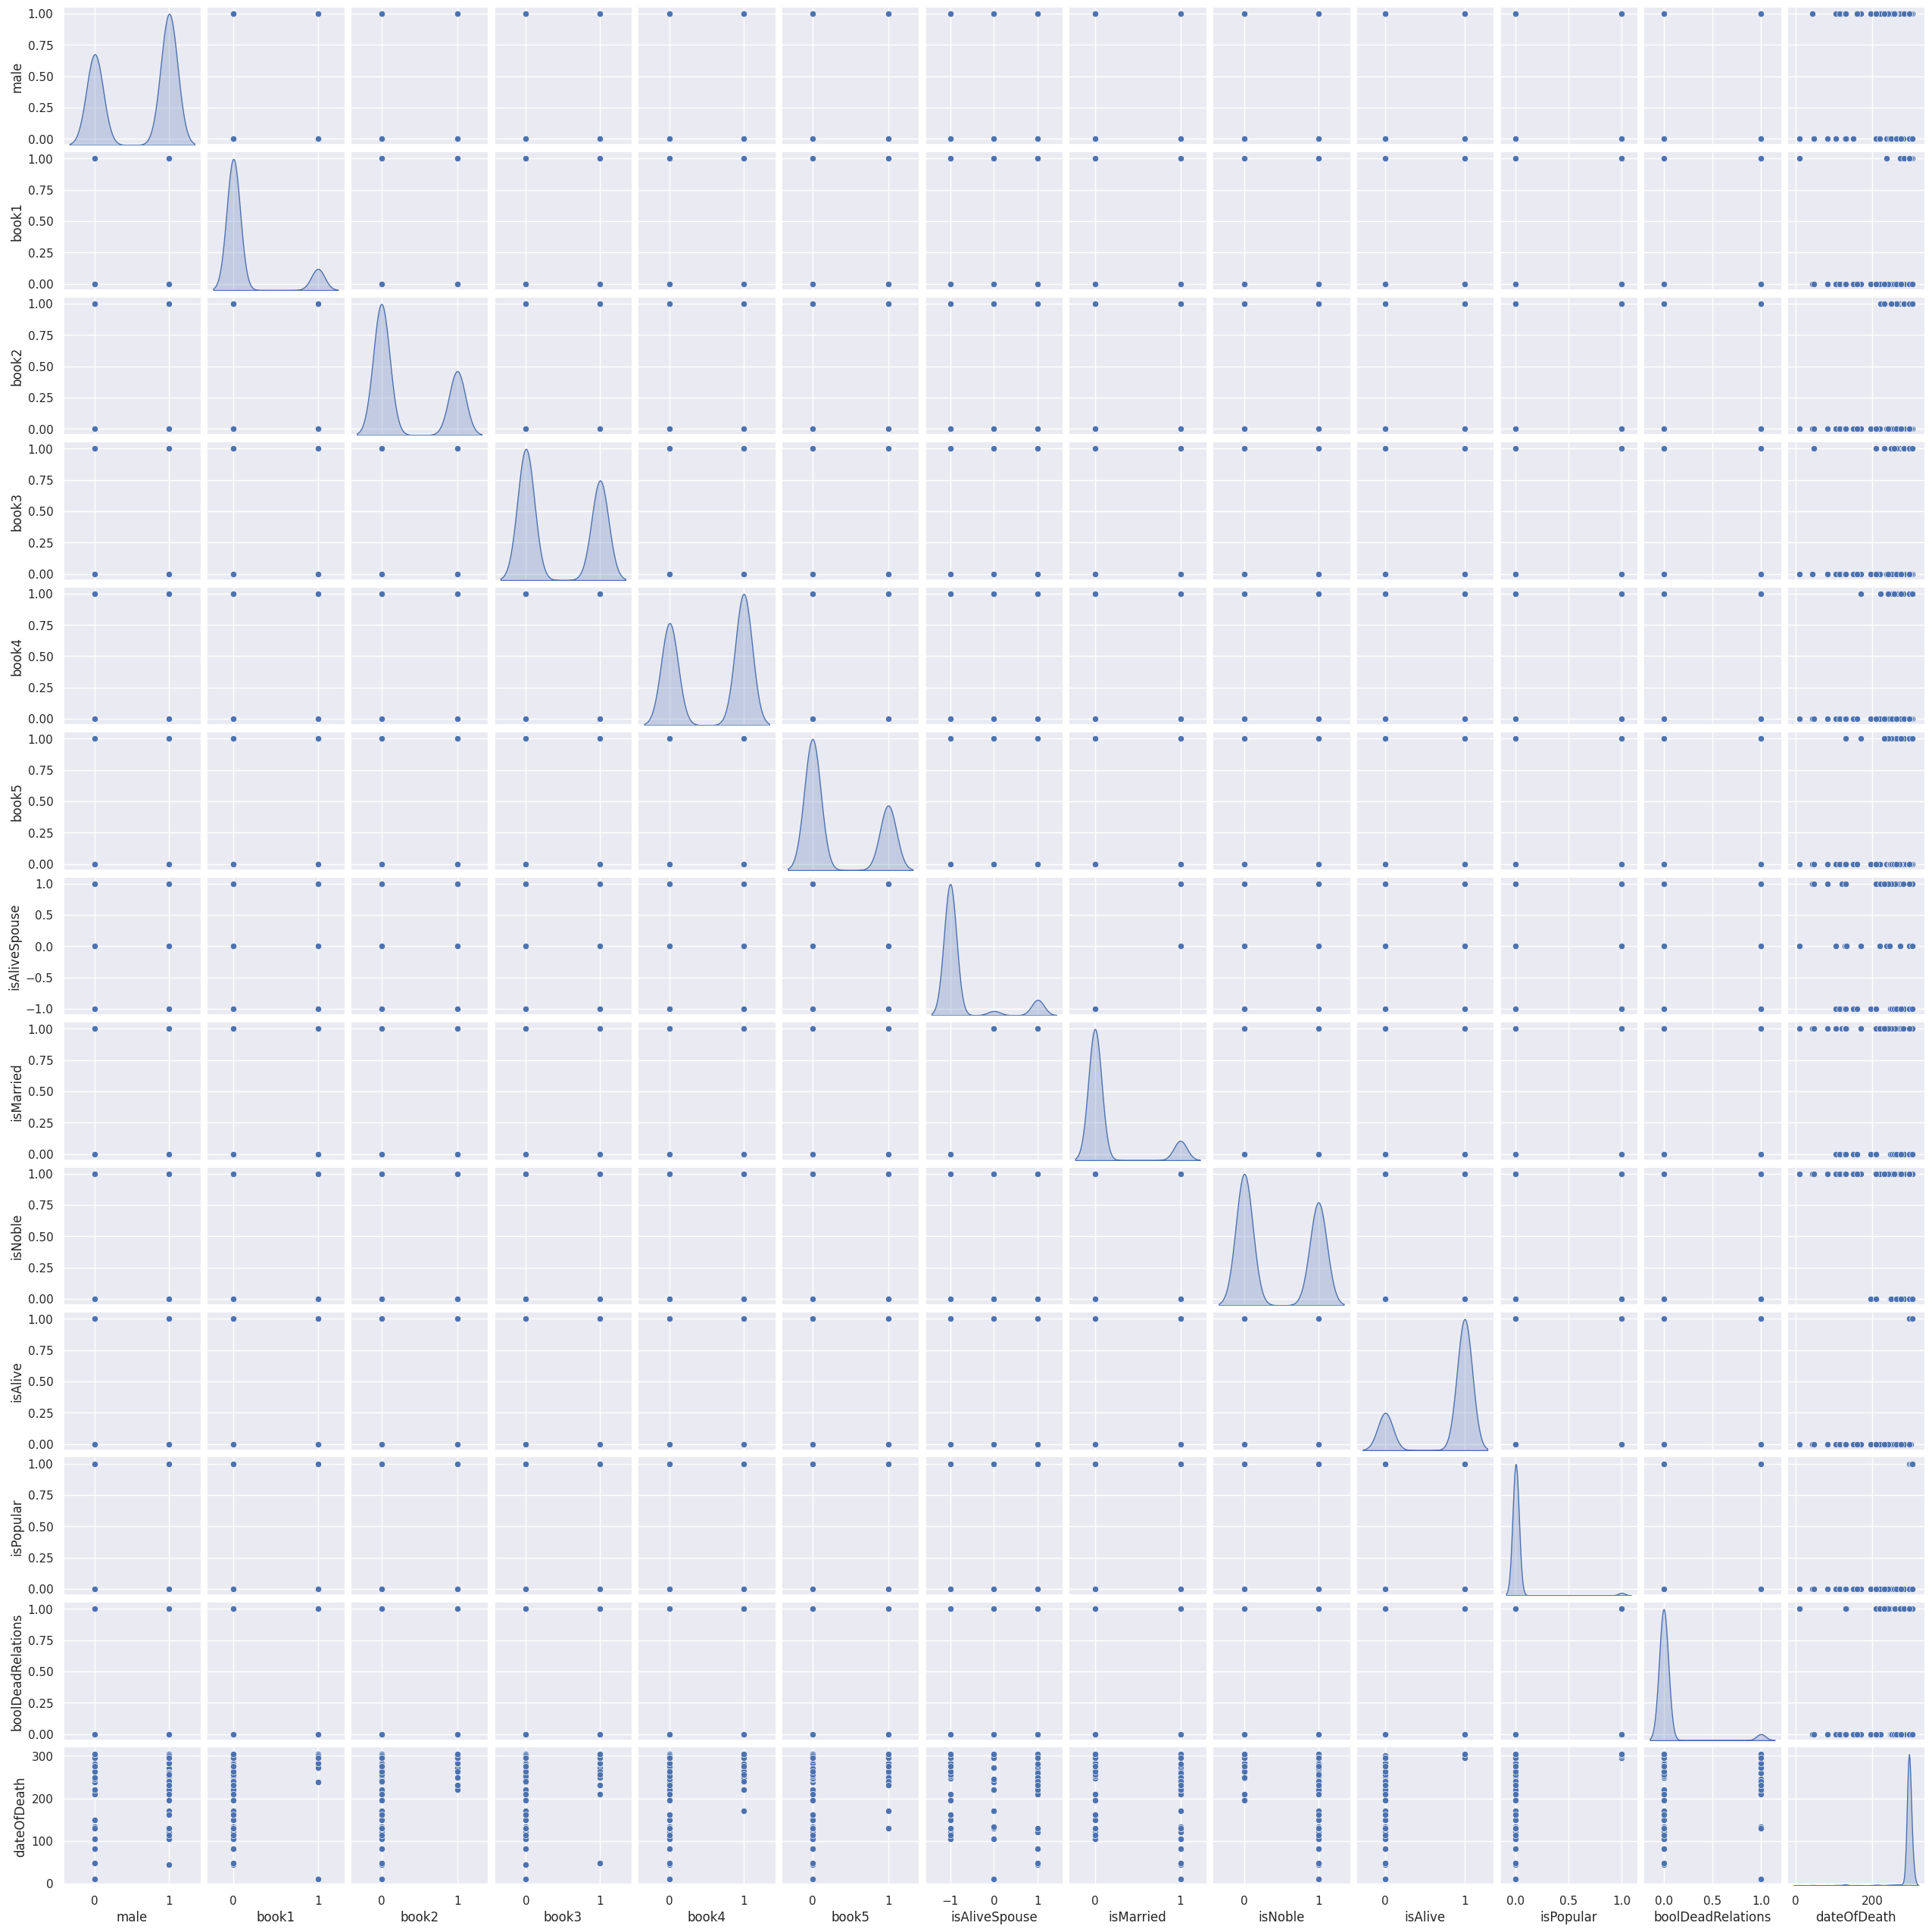

In [28]:
sns.set()
sns.pairplot(data, height = 2 ,kind ='scatter',diag_kind='kde') # взаимные графики на куче признаков
plt.show()

Наиболее сильно с целевой переменной коррелирует признак dateOfDeath

<Axes: >

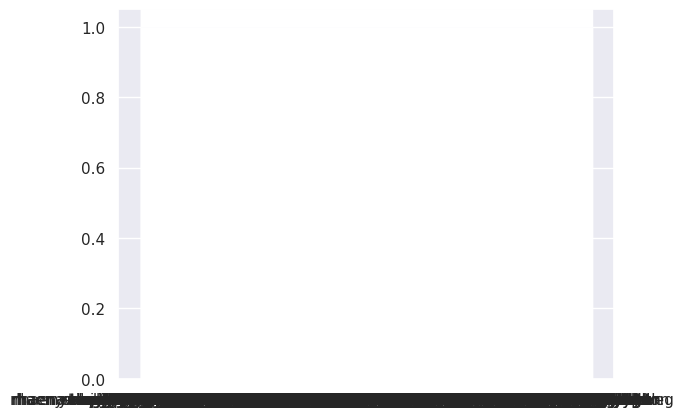

In [29]:
data.name.hist(bins=len(data))

Удалим столбец name, содержащий уникальные значения

In [30]:
data.drop(columns=['name'], inplace = True)

data.drop(columns=['name', 'spouse', 'boolDeadRelations', 'isPopular',
       'isAliveSpouse', 'isMarried', 'isNoble'], inplace = True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   object 
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   object 
 3   house              1557 non-null   object 
 4   spouse             1557 non-null   object 
 5   book1              1557 non-null   int64  
 6   book2              1557 non-null   int64  
 7   book3              1557 non-null   int64  
 8   book4              1557 non-null   int64  
 9   book5              1557 non-null   int64  
 10  isAliveSpouse      1557 non-null   float64
 11  isMarried          1557 non-null   int64  
 12  isNoble            1557 non-null   int64  
 13  isAlive            1557 non-null   int64  
 14  isPopular          1557 non-null   int64  
 15  boolDeadRelations  1557 non-null   int64  
 16  dateOfDeath        1557 non-n

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [32]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


Датасет несбалансирован по классам

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [33]:
data.describe()

,male,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,isAlive,isPopular,boolDeadRelations,dateOfDeath
count,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000
mean,0.590880,0.138728,0.327553,0.431599,0.562620,0.330122,-0.770071,0.128452,0.439306,0.778420,0.017341,0.044316,293.642261
std,0.491829,0.345774,0.469472,0.495458,0.496223,0.470408,0.616653,0.334700,0.496462,0.415443,0.130581,0.205862,23.107380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,296.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,296.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,296.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,305.000000


In [34]:
numerict_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerict_features

['male',
 'book1',
 'book2',
 'book3',
 'book4',
 'book5',
 'isAliveSpouse',
 'isMarried',
 'isNoble',
 'isAlive',
 'isPopular',
 'boolDeadRelations',
 'dateOfDeath']

In [35]:
data[numerict_features].corr()

,male,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,isAlive,isPopular,boolDeadRelations,dateOfDeath
male,1.000000,0.050526,0.024079,-0.008100,-0.101674,0.023022,-0.066823,-0.094385,0.133807,-0.148290,0.080518,0.039540,0.006906
book1,0.050526,1.000000,0.278116,0.145458,-0.009461,0.180542,0.025123,0.018072,0.041593,-0.112468,0.074789,0.139291,0.036781
book2,0.024079,0.278116,1.000000,0.380968,0.102247,0.135720,0.152590,0.153332,-0.033216,-0.055998,0.001636,0.055850,0.127634
book3,-0.008100,0.145458,0.380968,1.000000,0.329153,0.226547,0.162995,0.165407,0.007279,0.018427,-0.026356,0.032889,0.132669
book4,-0.101674,-0.009461,0.102247,0.329153,1.000000,0.302338,0.148240,0.141145,0.047394,0.284014,-0.061401,-0.024038,0.173099
book5,0.023022,0.180542,0.135720,0.226547,0.302338,1.000000,0.077136,0.065210,0.069338,0.032531,0.000907,0.094381,0.081584
isAliveSpouse,-0.066823,0.025123,0.152590,0.162995,0.148240,0.077136,1.000000,0.971557,0.133782,-0.036813,0.022283,0.172811,-0.149872
isMarried,-0.094385,0.018072,0.153332,0.165407,0.141145,0.065210,0.971557,1.000000,0.132037,-0.049381,0.022525,0.197150,-0.185593
isNoble,0.133807,0.041593,-0.033216,0.007279,0.047394,0.069338,0.133782,0.132037,1.000000,-0.060572,-0.038279,0.054631,-0.154076
isAlive,-0.148290,-0.112468,-0.055998,0.018427,0.284014,0.032531,-0.036813,-0.049381,-0.060572,1.000000,-0.118673,-0.178177,0.305181


<Axes: >

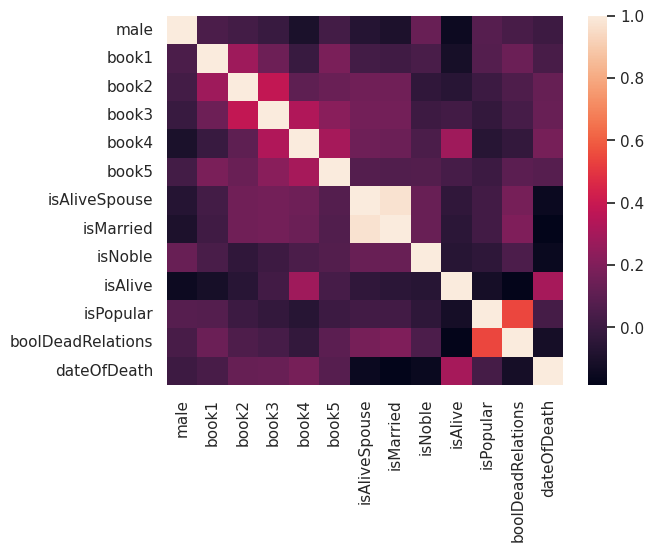

In [36]:
sns.heatmap(data[numerict_features].corr())

Присутствует небольшая корреляция между количественными признаками isMarried, isAliveSpouse, isPopular, boolDeadRelations и признаками book

Проверим корреляцию количественных признаков с целевой переменной isAlive

In [37]:
data[numerict_features].corr()['isAlive'].abs().sort_values(ascending=False)

,isAlive
isAlive,1.000000
dateOfDeath,0.305181
book4,0.284014
boolDeadRelations,0.178177
male,0.148290
isPopular,0.118673
book1,0.112468
isNoble,0.060572
book2,0.055998
isMarried,0.049381


Удалим признаки,мало коррелирующие с целевой переменной

In [38]:
data.drop(columns=['book4', 'book3', 'book5', 'isAliveSpouse', 'isMarried', 'book2', 'isNoble', 'book1', 'isPopular', 'title', 'male', 'boolDeadRelations', 'culture', 'house', 'spouse'], inplace=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   isAlive      1557 non-null   int64  
 1   dateOfDeath  1557 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 36.5 KB


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

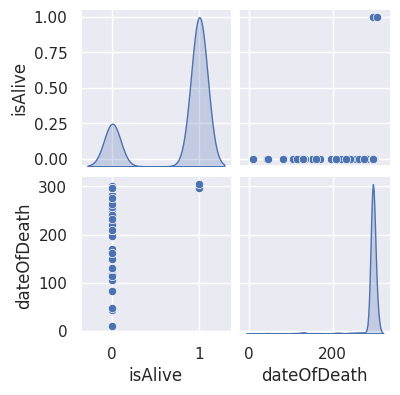

In [40]:
sns.set()
sns.pairplot(data, height = 2 ,kind ='scatter',diag_kind='kde') # взаимные графики на куче признаков
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [41]:
X = data.drop(columns=['isAlive'])
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [44]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [45]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [46]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
lr_y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [47]:
# Шаг 1. создание модели
adaboost = AdaBoostClassifier()
randomforest = RandomForestClassifier()
gaussian = GaussianProcessClassifier()
naive_bayes = GaussianNB()
knn =  KNeighborsClassifier()
svc= SVC()
tree = DecisionTreeClassifier()


# Шаг 2. обучение модели
adaboost.fit(X_train, y_train)
randomforest.fit(X_train, y_train)
gaussian.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
tree.fit(X_train, y_train)



# Шаг 3. Предсказание на тестовых данных
adaboost_y_pred = adaboost.predict(X_test)
randomforest_y_pred = randomforest.predict(X_test)
gaussian_y_pred = gaussian.predict(X_test)
naive_bayes_y_pred = naive_bayes.predict(X_test)
knn_y_pred = knn.predict(X_test)
svc_y_pred = svc.predict(X_test)
tree_y_pred = tree.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [48]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [49]:
# Шаг 3. Предсказание на тестовых данных
lr_y_pred = logistic_regression.predict(X_test)
# Шаг 4. Оценка предсказания по метрике accuracy
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Accuracy logistic_regression : %.4f" % lr_accuracy)

Accuracy logistic_regression : 0.8333


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [50]:
# Шаг 3. Предсказание на тестовых данных
adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
randomforest_accuracy = accuracy_score(y_test, randomforest_y_pred)
gaussian_accuracy = accuracy_score(y_test, gaussian_y_pred)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_y_pred)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
svc_accuracy = accuracy_score(y_test, svc_y_pred)
tree_accuracy = accuracy_score(y_test, tree_y_pred)
# Шаг 4. Оценка предсказания по метрике accuracy

print("adaboost : %.4f" % adaboost_accuracy)
print("gaussian : %.4f" % gaussian_accuracy)
print("randomforest : %.4f" % randomforest_accuracy)
print("naive_bayes : %.4f" % naive_bayes_accuracy)
print("knn : %.4f" % knn_accuracy)
print("svc : %.4f" % svc_accuracy)
print("tree : %.4f" % tree_accuracy)

adaboost : 0.8436
gaussian : 0.8436
randomforest : 0.8436
naive_bayes : 0.8333
knn : 0.8436
svc : 0.8333
tree : 0.8436


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [51]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 12.3MB/s]


In [52]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [53]:
data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

In [54]:
data_test.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


In [55]:
data_test.describe()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
count,389.000000,154.000000,389.000000,389.000000,389.000000,389.000000,389.000000,3.0,4.0,2.000000,76.00000,389.000000,389.000000,154.000000,389.00000,389.000000
mean,0.732648,3986.571429,0.437018,0.562982,0.676093,0.709512,0.655527,1.0,0.0,0.500000,0.75000,0.195373,0.547558,-3701.032468,0.77892,0.198391
std,0.443148,32738.182560,0.496656,0.496656,0.468568,0.454572,0.475808,0.0,0.0,0.707107,0.43589,0.396998,0.498374,32736.656684,2.08269,0.235136
min,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.00000,0.000000,0.000000,-298001.000000,0.00000,0.000000
25%,0.000000,239.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.250000,0.75000,0.000000,0.000000,21.000000,0.00000,0.050167
50%,1.000000,267.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.500000,1.00000,0.000000,1.000000,32.000000,0.00000,0.103679
75%,1.000000,280.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.750000,1.00000,0.000000,1.000000,53.750000,0.00000,0.230769
max,1.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.000000,1.00000,1.000000,1.000000,100.000000,15.00000,1.000000


<Axes: >

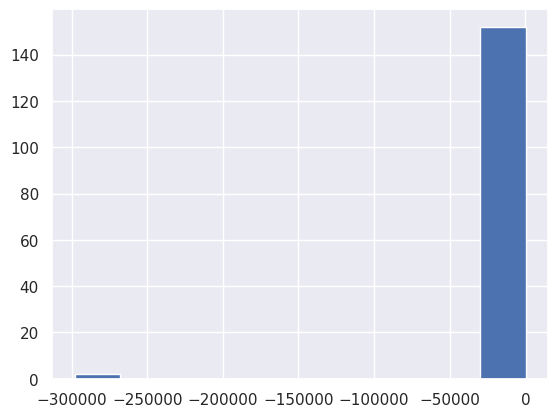

In [56]:
data_test['age'].hist()

<Axes: >

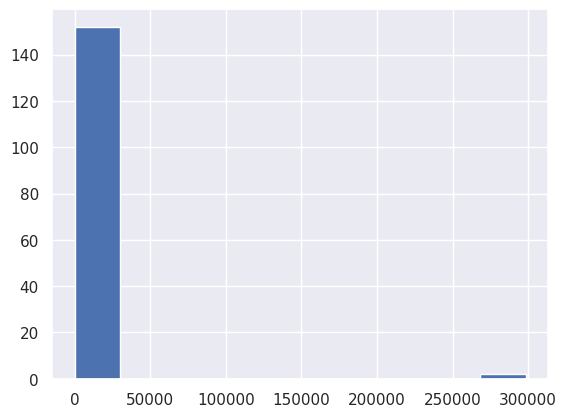

In [57]:
data_test['dateOfBirth'].hist()

In [58]:
data_test[data_test['age'] < 0]

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1685,Doreah,NaN,0,Lysene,278279.0,NaN,NaN,NaN,House Targaryen,NaN,...,1,NaN,NaN,NaN,NaN,0,0,-277980.0,0,0.110368
1869,Rhaego,NaN,0,NaN,298299.0,NaN,NaN,NaN,House Targaryen,NaN,...,0,NaN,NaN,NaN,NaN,0,0,-298001.0,6,0.167224


In [59]:
data_test[data_test['dateOfBirth'] > 50000]

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1685,Doreah,NaN,0,Lysene,278279.0,NaN,NaN,NaN,House Targaryen,NaN,...,1,NaN,NaN,NaN,NaN,0,0,-277980.0,0,0.110368
1869,Rhaego,NaN,0,NaN,298299.0,NaN,NaN,NaN,House Targaryen,NaN,...,0,NaN,NaN,NaN,NaN,0,0,-298001.0,6,0.167224


Тестовый датасет содержит две записи с отрицательным возрастом и датой рождения сильно выбивающейся из общего диапазона. Пока оставим  эти записи без изменений.

Применим к тестовому датасету предобработку данных, выполненную ранее на тренировочном датасете.




In [60]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              389 non-null    object 
 1   title             221 non-null    object 
 2   male              389 non-null    int64  
 3   culture           189 non-null    object 
 4   dateOfBirth       154 non-null    float64
 5   mother            3 non-null      object 
 6   father            4 non-null      object 
 7   heir              2 non-null      object 
 8   house             343 non-null    object 
 9   spouse            76 non-null     object 
 10  book1             389 non-null    int64  
 11  book2             389 non-null    int64  
 12  book3             389 non-null    int64  
 13  book4             389 non-null    int64  
 14  book5             389 non-null    int64  
 15  isAliveMother     3 non-null      float64
 16  isAliveFather     4 non-null      float64
 17

Заполним пропуски в столбцах age и dateOfBirth медианными значениями, вычисленными на тренировочном датасете

In [61]:
data_test.loc[data_test['age'].isna(), 'age'] = median_age_train
data_test.loc[data_test['dateOfBirth'].isna(), 'dateOfBirth' ] = median_dateofBirth_train


In [62]:
data_test['dateOfDeath'] = data_test['age'] + data_test['dateOfBirth']

In [63]:
data_test.drop(columns=['book4','age', 'dateOfBirth', 'name', 'mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'book3', 'book5', 'isAliveSpouse', 'isMarried', 'book2', 'isNoble', 'book1', 'title', 'male', 'culture', 'house', 'spouse','popularity', 'numDeadRelations', 'culture' ], inplace=True)



In [64]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dateOfDeath  389 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


Используем для предсказаний модель adaboost

In [65]:
pred = adaboost.predict(data_test)
pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [66]:
submission['isAlive']  = pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [67]:
submission.to_csv("/content/new_submission.csv", index=False)